# AML Final Project
Name: Parth Batra(pb2882), Bora Elci(be2246), Mark Wu(rw2921), Shruti Agarwal(sa4136)

Introduction: 
Home Credit is a financial provider that is trying to make borrowing a positive experience and ensure that clients capable of repayment are not rejected. In this project, we try to utilize alternate data such as transactional history in order to predict the client’s repaying ability and thus allow people with repayment ability to obtain the loan they need.


In [ ]:
!pip install shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
app_train = pd.read_csv('/content/drive/MyDrive/AML Project/Data/application_train.csv')
app_test = pd.read_csv('/content/drive/MyDrive/AML Project/Data/application_test.csv')

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
print(app_train.shape)
print(app_test.shape)
train_row_count = app_train.shape[0]
test_row_count = app_test.shape[0]
total_row_count = train_row_count + test_row_count
print(f"Training size percentage: {round(train_row_count/total_row_count*100,1)}%")
print(f"Test size percentage: {round(test_row_count/total_row_count*100,1)}%")

(307511, 122)
(48744, 121)
Training size percentage: 86.3%
Test size percentage: 13.7%


In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Distribution of Target Variable

0    282686
1     24825
Name: TARGET, dtype: int64


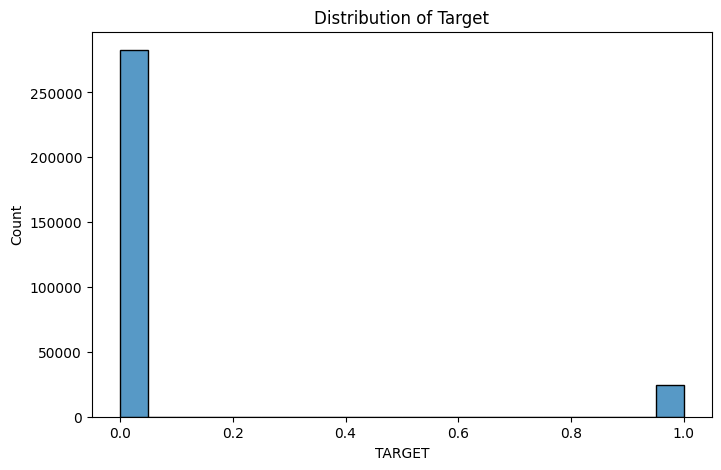

In [ ]:
plt.figure(figsize=(8,5))
plot = sns.histplot(data=app_train, x='TARGET')
plot.set_title(f"Distribution of Target")
print(app_train['TARGET'].value_counts())
plt.show()

# Categorical Variables

In [ ]:
cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']

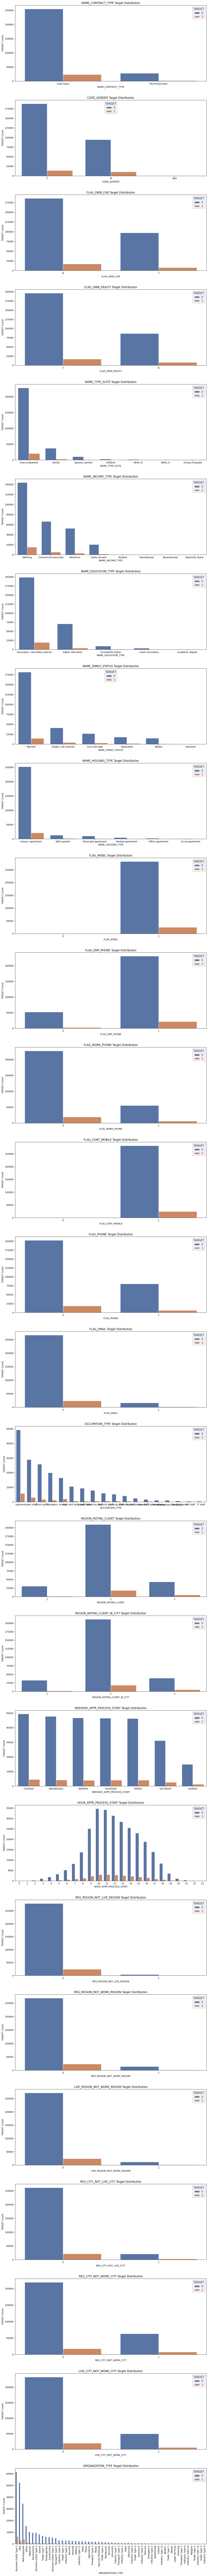

In [ ]:
fig, axs = plt.subplots(len(cat), 1,figsize = (15,200))
sns.set(style = "darkgrid")
plt.subplots_adjust(hspace = 0.25, wspace = 0.3)

for i in range(len(cat)):

    sns.barplot(data = app_train[[cat[i],'TARGET']]\
                .value_counts().reset_index()\
                .rename(columns = {0:'TARGET Count'}),
                x = cat[i], y = 'TARGET Count' ,
        hue = 'TARGET', ax = axs[i])\
    .set(title = f'{cat[i]} Target Distribution')

plt.xticks(rotation = 90)
plt.show()

# Numerical Variables

In [ ]:
num = [
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'CNT_FAM_MEMBERS',
    'OWN_CAR_AGE',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_HOUR_T',
    'AMT_REQ_CREDIT_BUREAU_DAY_T', 
    'AMT_REQ_CREDIT_BUREAU_WEEK_T', 
    'AMT_REQ_CREDIT_BUREAU_MON_T', 
    'AMT_REQ_CREDIT_BUREAU_QRT_T',
    'AMT_REQ_CREDIT_BUREAU_YEAR_T'
    ]

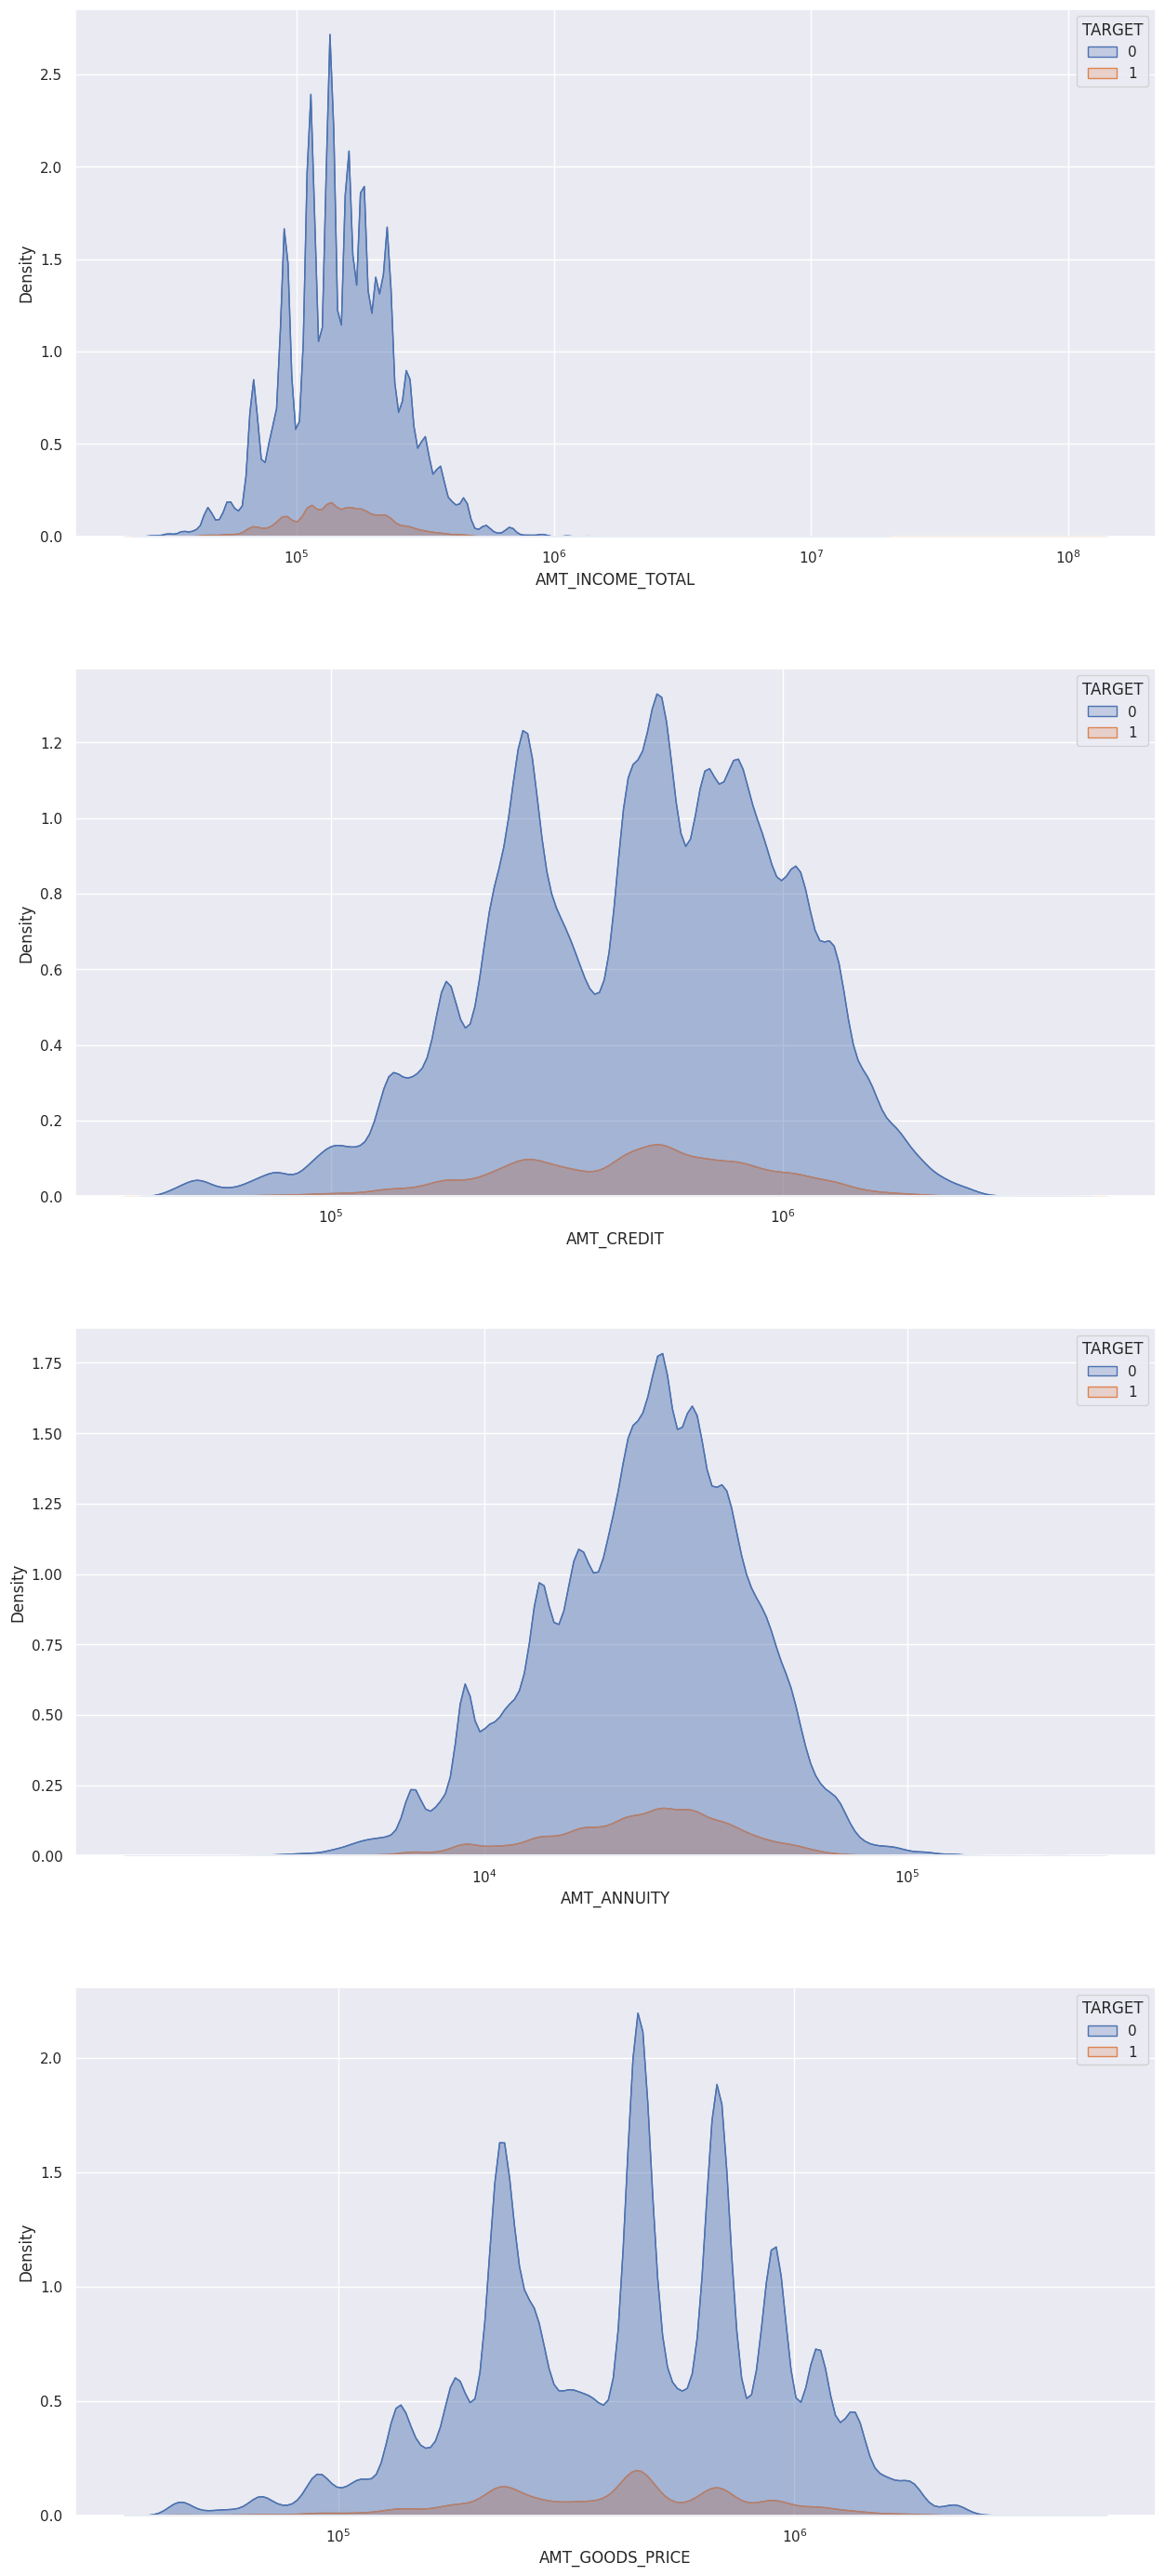

In [ ]:
amount_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
fig, axs = plt.subplots(len(amount_cols), 1,figsize = (15,35))
sns.set(style = "darkgrid")
plt.subplots_adjust(hspace = 0.25, wspace = 0.3)

for i in range(len(amount_cols)):

    sns.kdeplot(data = app_train, x = amount_cols[i], hue = 'TARGET',
                log_scale = True, fill = True, color = 'blue', ax = axs[i])
    
    sns.kdeplot(data = app_train, x = amount_cols[i], hue = 'TARGET',
                log_scale = True, fill = True, color = 'orange', ax = axs[i])
    
plt.show()

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
app_train.isna().sum()/len(app_train)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [ ]:
#Imputing missing values by -1 
app_train.loc[app_train['FLAG_OWN_CAR']=='N','OWN_CAR_AGE']= -1
app_train.loc[app_train['OBS_30_CNT_SOCIAL_CIRCLE'].isna()==True,'OBS_30_CNT_SOCIAL_CIRCLE'] = -1
app_train.loc[app_train['DEF_30_CNT_SOCIAL_CIRCLE'].isna()==True,'DEF_30_CNT_SOCIAL_CIRCLE'] = -1
app_train.loc[app_train['OBS_60_CNT_SOCIAL_CIRCLE'].isna()==True,'OBS_60_CNT_SOCIAL_CIRCLE'] = -1
app_train.loc[app_train['DEF_60_CNT_SOCIAL_CIRCLE'].isna()==True,'DEF_60_CNT_SOCIAL_CIRCLE'] = -1

In [ ]:
# Replacing missing values with NA
app_train.loc[app_train['OCCUPATION_TYPE'].isna()==True,'OCCUPATION_TYPE'] = 'NA'
app_train.loc[app_train['NAME_TYPE_SUITE'].isna()==True,'NAME_TYPE_SUITE'] = 'NA'

In [ ]:
# Dropping columns with more than 35% missing values
drop_cols = [col for col in app_train.columns if len(app_train.loc[app_train[col].isna()==True])*100/len(app_train)>=35]
app_train.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
# Replacing missing values with nan
app_train.loc[app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].isna()==True,'AMT_REQ_CREDIT_BUREAU_HOUR'] = np.nan
app_train.loc[app_train['AMT_REQ_CREDIT_BUREAU_DAY'].isna()==True,'AMT_REQ_CREDIT_BUREAU_DAY'] = np.nan
app_train.loc[app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].isna()==True,'AMT_REQ_CREDIT_BUREAU_WEEK'] = np.nan
app_train.loc[app_train['AMT_REQ_CREDIT_BUREAU_MON'].isna()==True,'AMT_REQ_CREDIT_BUREAU_MON'] = np.nan
app_train.loc[app_train['AMT_REQ_CREDIT_BUREAU_QRT'].isna()==True,'AMT_REQ_CREDIT_BUREAU_QRT'] = np.nan
app_train.loc[app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].isna()==True,'AMT_REQ_CREDIT_BUREAU_YEAR'] = np.nan
app_train.loc[app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].isna()==True,'AMT_REQ_CREDIT_BUREAU_HOUR'] = np.nan
app_train.loc[app_train['EXT_SOURCE_3'].isna()==True,'EXT_SOURCE_3'] = np.nan

In [ ]:
from sklearn.model_selection import train_test_split
app_train_y_train = app_train["TARGET"]
X_dev, X_test, y_dev, y_test = train_test_split(app_train.drop('TARGET',axis = 1), app_train_y_train, test_size=0.2, random_state=0, stratify = app_train_y_train)

In [ ]:
# Imputing missing values with median
from sklearn.impute import SimpleImputer

simple_imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['AMT_REQ_CREDIT_BUREAU_HOUR_T'] = simple_imputer1.fit_transform(np.array(X_dev['AMT_REQ_CREDIT_BUREAU_HOUR']).reshape(-1,1))
X_test['AMT_REQ_CREDIT_BUREAU_HOUR_T'] = simple_imputer1.transform(np.array(X_test['AMT_REQ_CREDIT_BUREAU_HOUR']).reshape(-1,1))

simple_imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['AMT_REQ_CREDIT_BUREAU_DAY_T'] = simple_imputer2.fit_transform(np.array(X_dev['AMT_REQ_CREDIT_BUREAU_DAY']).reshape(-1,1))
X_test['AMT_REQ_CREDIT_BUREAU_DAY_T'] = simple_imputer2.transform(np.array(X_test['AMT_REQ_CREDIT_BUREAU_DAY']).reshape(-1,1))

simple_imputer3 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['AMT_REQ_CREDIT_BUREAU_WEEK_T'] = simple_imputer3.fit_transform(np.array(X_dev['AMT_REQ_CREDIT_BUREAU_WEEK']).reshape(-1,1))
X_test['AMT_REQ_CREDIT_BUREAU_WEEK_T'] = simple_imputer3.transform(np.array(X_test['AMT_REQ_CREDIT_BUREAU_WEEK']).reshape(-1,1))

simple_imputer4 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['AMT_REQ_CREDIT_BUREAU_MON_T'] = simple_imputer4.fit_transform(np.array(X_dev['AMT_REQ_CREDIT_BUREAU_MON']).reshape(-1,1))
X_test['AMT_REQ_CREDIT_BUREAU_MON_T'] = simple_imputer4.transform(np.array(X_test['AMT_REQ_CREDIT_BUREAU_MON']).reshape(-1,1))

simple_imputer5 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['AMT_REQ_CREDIT_BUREAU_QRT_T'] = simple_imputer5.fit_transform(np.array(X_dev['AMT_REQ_CREDIT_BUREAU_QRT']).reshape(-1,1))
X_test['AMT_REQ_CREDIT_BUREAU_QRT_T'] = simple_imputer5.transform(np.array(X_test['AMT_REQ_CREDIT_BUREAU_QRT']).reshape(-1,1))

simple_imputer6 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['AMT_REQ_CREDIT_BUREAU_YEAR_T'] = simple_imputer6.fit_transform(np.array(X_dev['AMT_REQ_CREDIT_BUREAU_YEAR']).reshape(-1,1))
X_test['AMT_REQ_CREDIT_BUREAU_YEAR_T'] = simple_imputer6.transform(np.array(X_test['AMT_REQ_CREDIT_BUREAU_YEAR']).reshape(-1,1))

simple_imputer7 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['EXT_SOURCE_3'] = simple_imputer7.fit_transform(np.array(X_dev['EXT_SOURCE_3']).reshape(-1,1))
X_test['EXT_SOURCE_3'] = simple_imputer7.transform(np.array(X_test['EXT_SOURCE_3']).reshape(-1,1))

simple_imputer8 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['EXT_SOURCE_2'] = simple_imputer8.fit_transform(np.array(X_dev['EXT_SOURCE_2']).reshape(-1,1))
X_test['EXT_SOURCE_2'] = simple_imputer8.transform(np.array(X_test['EXT_SOURCE_2']).reshape(-1,1))

simple_imputer9 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['AMT_ANNUITY'] = simple_imputer9.fit_transform(np.array(X_dev['AMT_ANNUITY']).reshape(-1,1))
X_test['AMT_ANNUITY'] = simple_imputer9.transform(np.array(X_test['AMT_ANNUITY']).reshape(-1,1))

simple_imputer10 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['OWN_CAR_AGE'] = simple_imputer10.fit_transform(np.array(X_dev['OWN_CAR_AGE']).reshape(-1,1))
X_test['OWN_CAR_AGE'] = simple_imputer10.transform(np.array(X_test['OWN_CAR_AGE']).reshape(-1,1))

simple_imputer11 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['OBS_30_CNT_SOCIAL_CIRCLE'] = simple_imputer11.fit_transform(np.array(X_dev['OBS_30_CNT_SOCIAL_CIRCLE']).reshape(-1,1))
X_test['OBS_30_CNT_SOCIAL_CIRCLE'] = simple_imputer11.transform(np.array(X_test['OBS_30_CNT_SOCIAL_CIRCLE']).reshape(-1,1))

simple_imputer12 = SimpleImputer(missing_values=np.nan, strategy='median')
X_dev['DAYS_LAST_PHONE_CHANGE'] = simple_imputer12.fit_transform(np.array(X_dev['DAYS_LAST_PHONE_CHANGE']).reshape(-1,1))
X_test['DAYS_LAST_PHONE_CHANGE'] = simple_imputer12.transform(np.array(X_test['DAYS_LAST_PHONE_CHANGE']).reshape(-1,1))

In [ ]:
X_dev.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis = 1, inplace = True)

X_test.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis = 1, inplace = True)

## Correlation Matrix

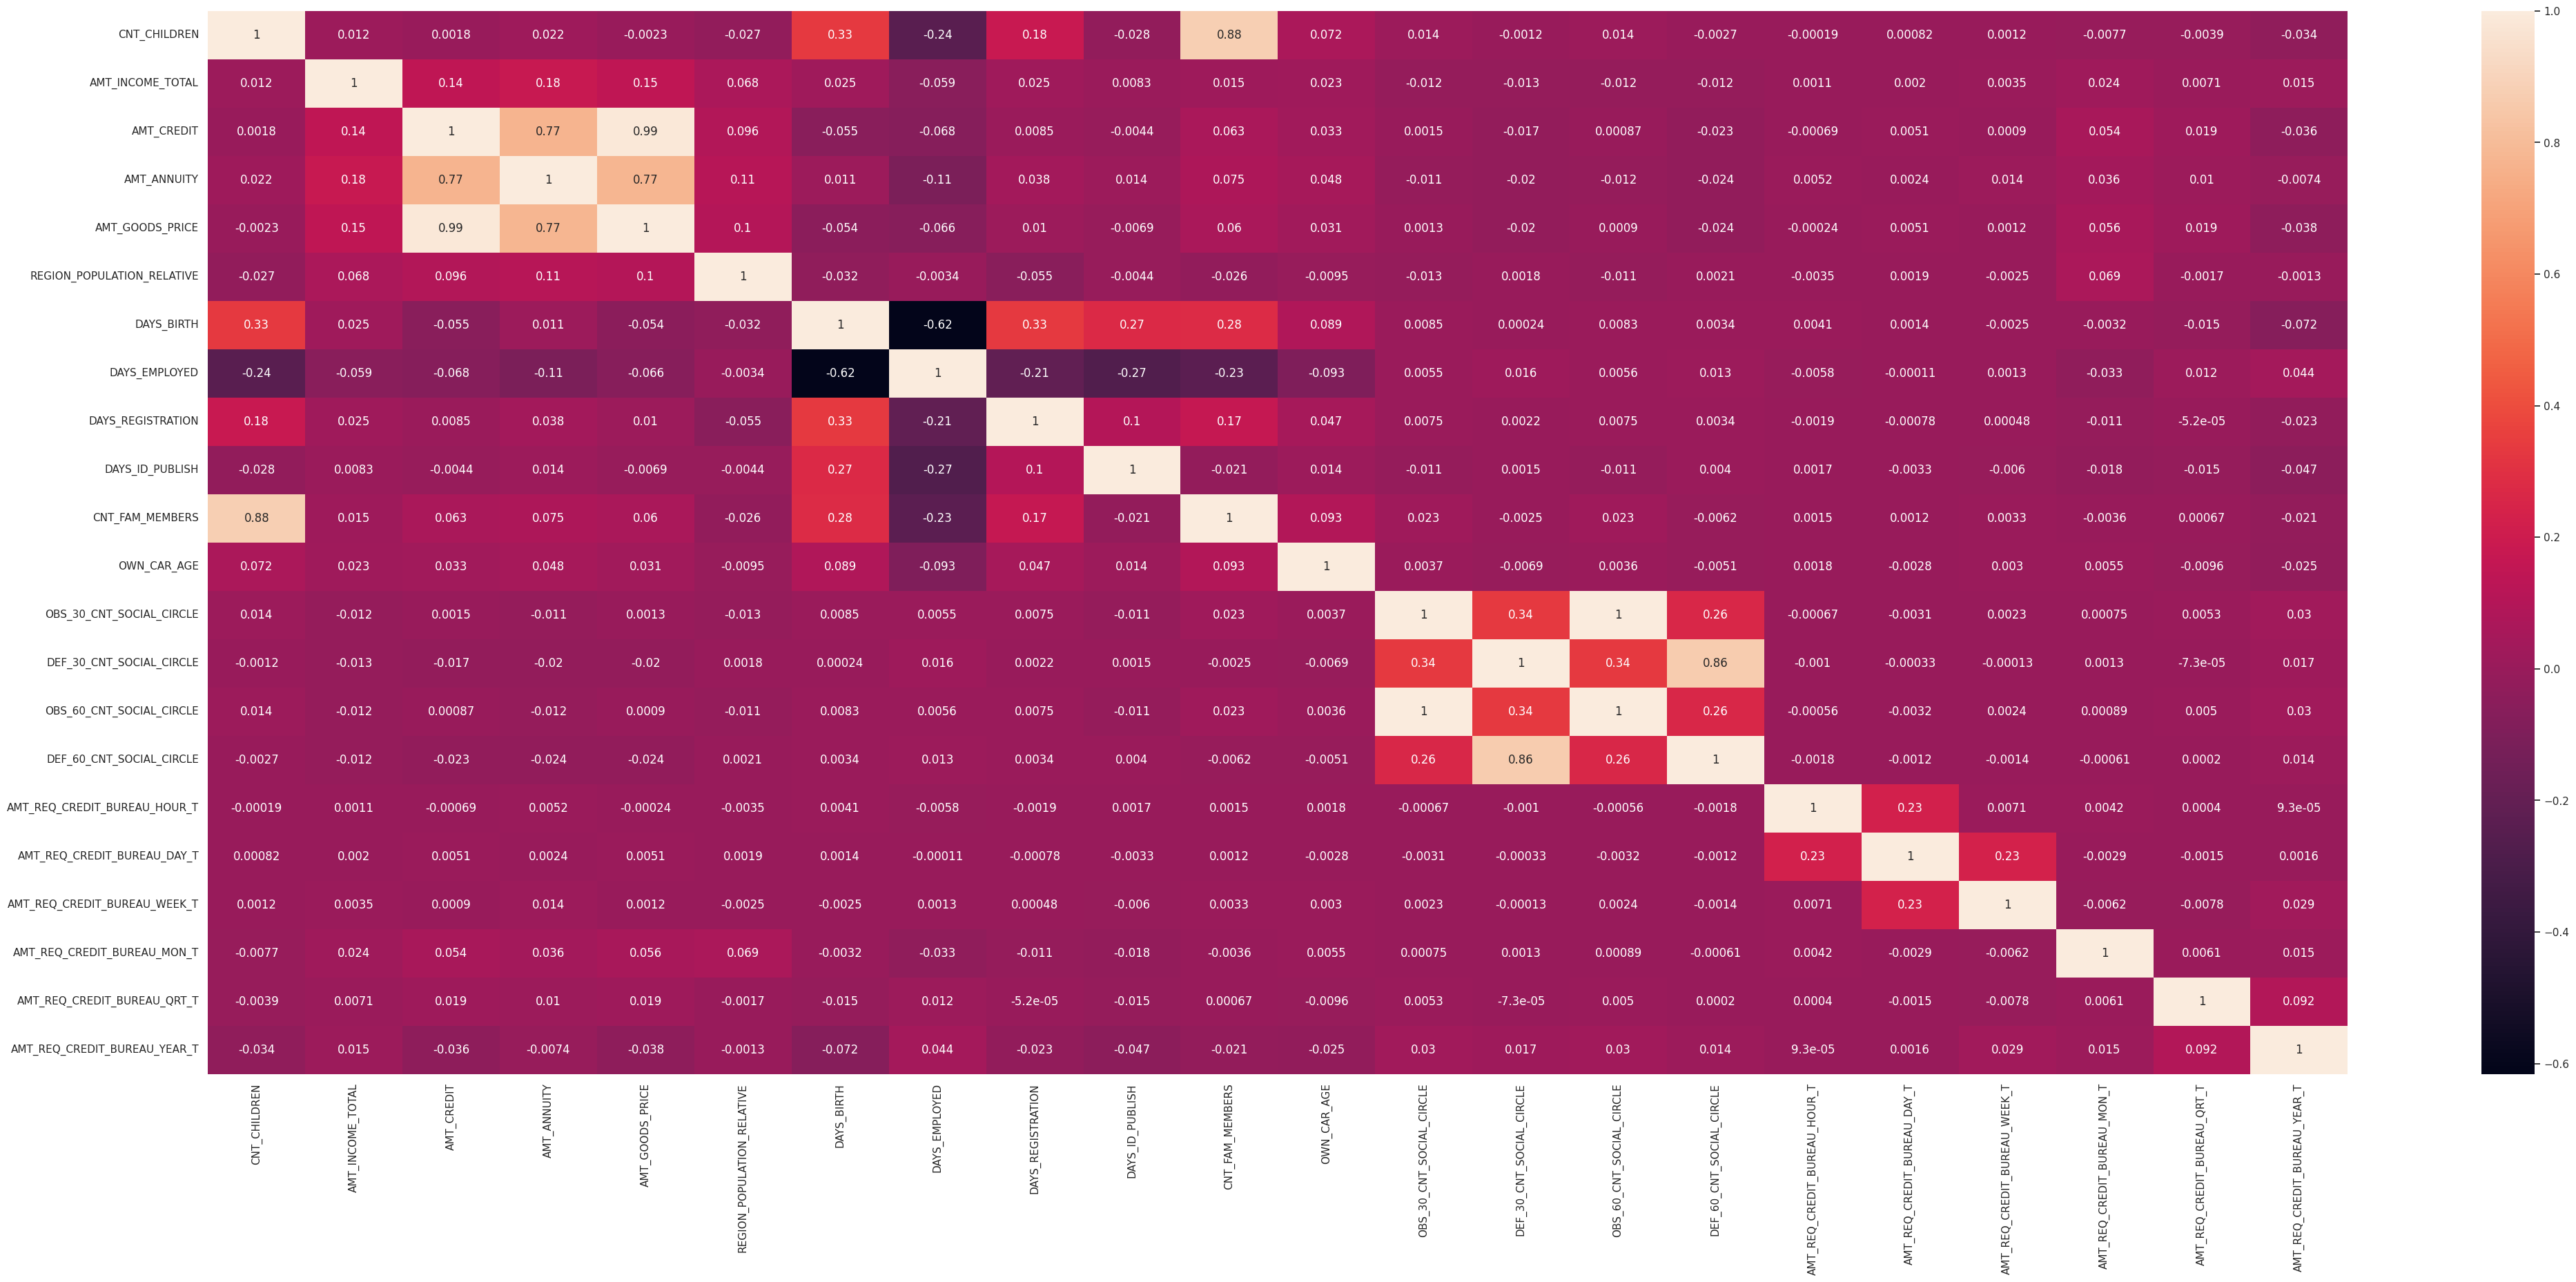

In [ ]:
plt.figure(figsize=(50,20))
mat = X_dev[num].corr()
sns.heatmap(mat, annot=True)
plt.show()

In [ ]:
# Dropping columns with more than 85% collinearity

corr_matrix = X_dev.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] >= 0.85)]

# Drop features 
X_dev.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

<ipython-input-32-156500062292>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X_dev.corr().abs()
<ipython-input-32-156500062292>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
app_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,-1.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,-1.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',	'DAYS_LAST_PHONE_CHANGE',
       	'FLAG_DOCUMENT_2',	'FLAG_DOCUMENT_3',	'FLAG_DOCUMENT_4',	'FLAG_DOCUMENT_5',	'FLAG_DOCUMENT_6',
        'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',	'FLAG_DOCUMENT_10',	'FLAG_DOCUMENT_11',
        'FLAG_DOCUMENT_12',	'FLAG_DOCUMENT_13',	'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',	'FLAG_DOCUMENT_16',
        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',	'FLAG_DOCUMENT_19',	'FLAG_DOCUMENT_20',	'FLAG_DOCUMENT_21',
        'AMT_REQ_CREDIT_BUREAU_HOUR_T', 'AMT_REQ_CREDIT_BUREAU_DAY_T', 'AMT_REQ_CREDIT_BUREAU_WEEK_T'
        , 'AMT_REQ_CREDIT_BUREAU_MON_T', 'AMT_REQ_CREDIT_BUREAU_QRT_T',	'AMT_REQ_CREDIT_BUREAU_YEAR_T',
  ]

cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']

te = ['OCCUPATION_TYPE','ORGANIZATION_TYPE']


In [ ]:
num = list(set(num))
cat = list(set(cat))
te = list(set(te))

In [ ]:
!pip install category_encoders
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

mixed_df = X_dev[num + cat + te]
target = y_dev
preprocess = make_column_transformer((StandardScaler(), num),
                                     (TargetEncoder(), te),
                                     (OneHotEncoder(), cat),
                                     remainder = "drop")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x_dev = preprocess.fit_transform(X_dev, y_dev)
x_test = preprocess.transform(X_test)

In [ ]:
preprocess.named_transformers_.keys()

dict_keys(['standardscaler', 'targetencoder', 'onehotencoder', 'remainder'])

In [ ]:
ohe_cols = preprocess.named_transformers_['onehotencoder'].get_feature_names_out()
target_cols = preprocess.named_transformers_['targetencoder'].get_feature_names_out()
sc_cols = preprocess.named_transformers_['standardscaler'].get_feature_names_out()

final_cols = list(ohe_cols) + list(target_cols) + list(sc_cols)

In [ ]:
x_dev = pd.DataFrame(x_dev, columns = final_cols)
x_test = pd.DataFrame(x_test, columns = final_cols)

In [ ]:
# ## Sampling using SMOTE
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# x_smote, y_smote = oversample.fit_resample(x_train, y_train)

# Models
## Logistic Regression

In [ ]:
# gridsearch for logistic model
from sklearn.linear_model import LogisticRegression
lr_hyp = LogisticRegression()
lr_params = {'penalty':['none','l2'],
             'C':np.logspace(-1,1,3),
             'class_weight':['balanced'],
             'max_iter' : [1000]}
lr_grid = GridSearchCV(estimator = lr_hyp, param_grid = lr_params,
              cv = 5, verbose=2, n_jobs = -1, error_score = 'raise')
lr_grid.fit(x_dev,y_dev)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             n_jobs=-1,
             param_grid={'C': array([ 0.1,  1. , 10. ]),
                         'class_weight': ['balanced'], 'max_iter': [1000],
                         'penalty': ['none', 'l2']},
             verbose=2)

In [ ]:
lr_model = LogisticRegression(penalty = lr_grid.best_params_['penalty'],
                              C = lr_grid.best_params_['C'],
                              class_weight= lr_grid.best_params_['class_weight'],
                              max_iter = 1000)
lr_model.fit(x_dev,y_dev)
lr_predict = lr_model.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, confusion_matrix

confusion_matrix(y_true = y_test, y_pred = lr_predict)

array([[39066, 17472],
       [ 1626,  3339]])

In [ ]:
print('Accuracy score: ', accuracy_score(y_true = y_test, y_pred = lr_predict))
print('Precision score: ', precision_score(y_true = y_test, y_pred = lr_predict))
print('Recall score: ', recall_score(y_true = y_test, y_pred = lr_predict))
print('F1_score score: ', f1_score(y_true = y_test, y_pred = lr_predict))
print('Average precision score: ', average_precision_score(y_true = y_test, y_score = lr_model.predict_proba(x_test)[:,1]))

accuracy score:  0.6894785620213648
precision score:  0.16044399596367306
recall score:  0.6725075528700907
f1_score score:  0.25907821229050276
average precision score:  0.22096974978254602


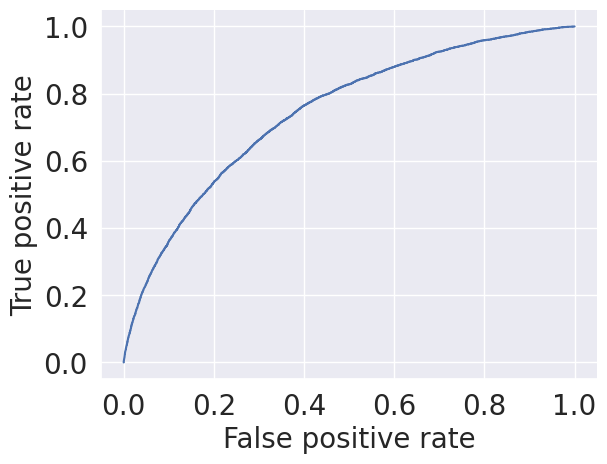

In [ ]:
#roc curve for lr model
from sklearn.metrics import roc_curve
lr_prob = lr_model.predict_proba(pd.DataFrame(x_test))[:,1]

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, lr_prob, pos_label=1)

# roc curve 
plt.figure()
plt.plot(fpr_lr,tpr_lr)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

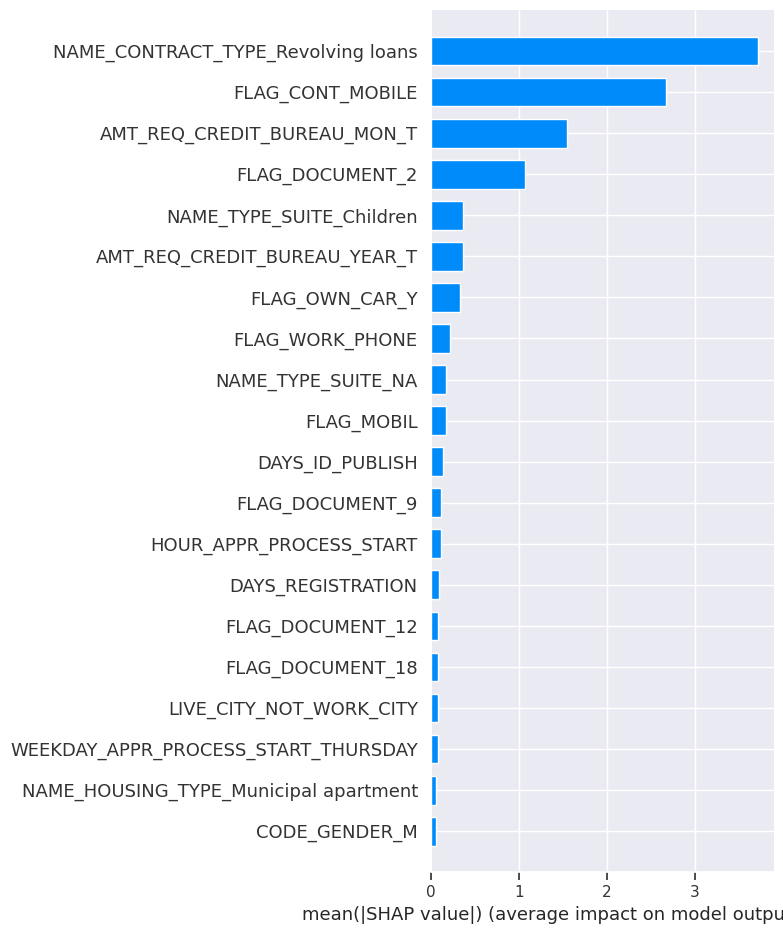

In [ ]:
import shap
masker_lr = shap.maskers.Independent(data= x_dev)
explainer_lr = shap.LinearExplainer(lr_model, masker = masker_lr)
shap_values_lr = explainer_lr.shap_values(pd.DataFrame(x_test,columns = x_test.columns))
shap.initjs()
shap.summary_plot(shap_values_lr, pd.DataFrame(x_test,columns = x_test.columns), plot_type='bar')

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_dev,y_dev)
rf_predict = rf.predict(x_test)

In [ ]:
# # gridsearch for randomforest model
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(random_state = 42)
# rf_params = { 
#     'n_estimators': [200, 500],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [2,5,8,10,12],
#     'criterion' :['gini', 'entropy']
# }
# rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv= 5)
# rf_grid.fit(x_dev, y_dev)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, confusion_matrix

confusion_matrix(y_true = y_test, y_pred = rf_predict)

array([[56536,     2],
       [ 4954,    11]])

In [ ]:
## performance metrics for random forest
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rf_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test, rf_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test, rf_predict)))
print("F1-score is {0:.2f}".format(f1_score(y_test, rf_predict)))
print("Average Precision is {0:.2f}".format(average_precision_score(y_test, rf.predict_proba(x_test)[:,1])))

Accuracy is 0.92
Precision is 0.85
Recall is 0.00
F1-score is 0.00
Average Precision is 0.20


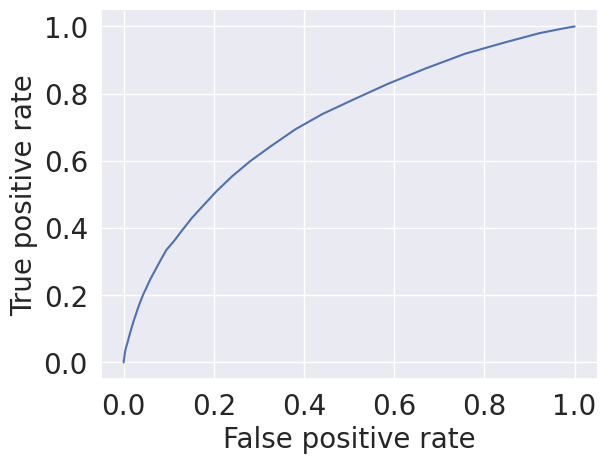

In [ ]:
#roc curve for rf model
from sklearn.metrics import roc_curve
rf_prob = rf.predict_proba(pd.DataFrame(x_test))[:,1]

# roc curve for models
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, rf_prob, pos_label=1)

# roc curve 
plt.figure()
plt.plot(fpr_rf,tpr_rf)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

In [ ]:
# # shap value plot for random forest, this takes too long
# import shap
# explainer_rf = shap.TreeExplainer(rf)
# shap_values_rf = explainer_rf.shap_values(x_test)
# shap.summary_plot(shap_values_rf, x_test)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_dev, y_dev)
xgb_predict = xgb.predict(x_test)

In [ ]:
xgb_hyper = XGBClassifier(seed=42)
xgbparams = {
    'max_depth': [2, 5],
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05]
}
xgb_grid = GridSearchCV(
    estimator=xgb_hyper,
    param_grid=xgbparams,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)
xgb_grid.fit(x_dev, y_dev)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=True)

In [ ]:
print('Accuracy score: ', accuracy_score(y_true = y_test, y_pred = xgb_predict))
print('Precision score: ', precision_score(y_true = y_test, y_pred = xgb_predict))
print('Recall score: ', recall_score(y_true = y_test, y_pred = xgb_predict))
print('F1_score score: ', f1_score(y_true = y_test, y_pred = xgb_predict))
print('Average precision: ', average_precision_score(y_test, xgb.predict_proba(x_test)[:,1]))

accuracy score:  0.9192722306228964
precision score:  0.5
recall score:  0.027391742195367573
f1_score score:  0.05193813251861753
accuracy score:  0.2244819087867537


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


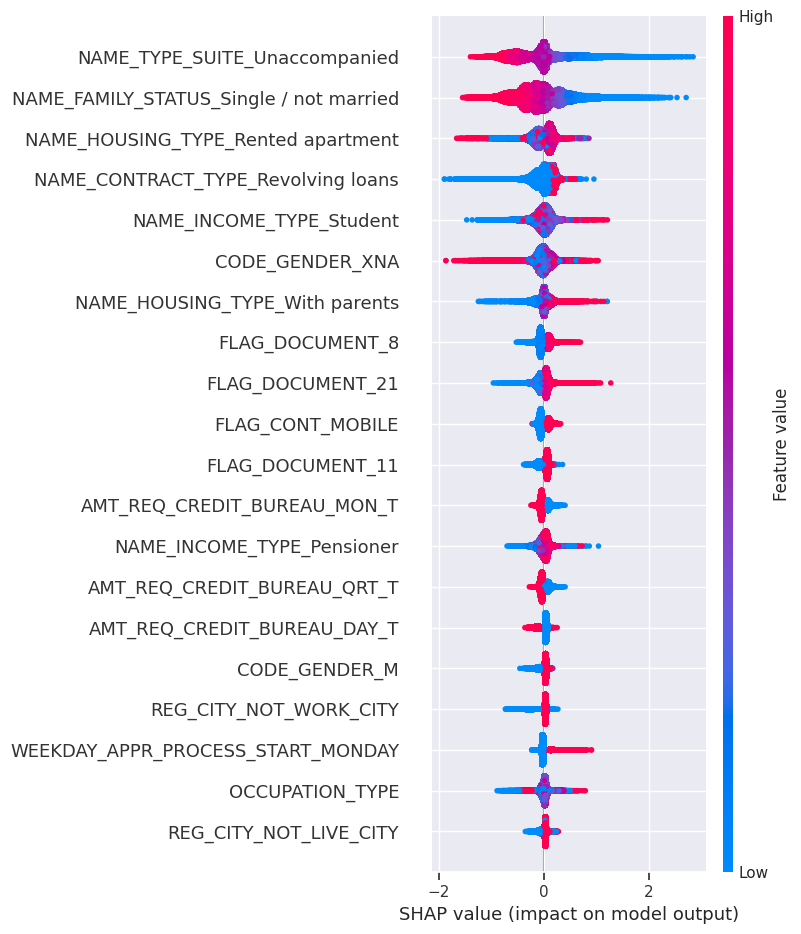

In [ ]:
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(x_dev)
shap.summary_plot(shap_values_xgb, x_dev)

In [ ]:
confusion_matrix(y_true = y_test, y_pred = xgb_predict)

array([[56402,   136],
       [ 4829,   136]])

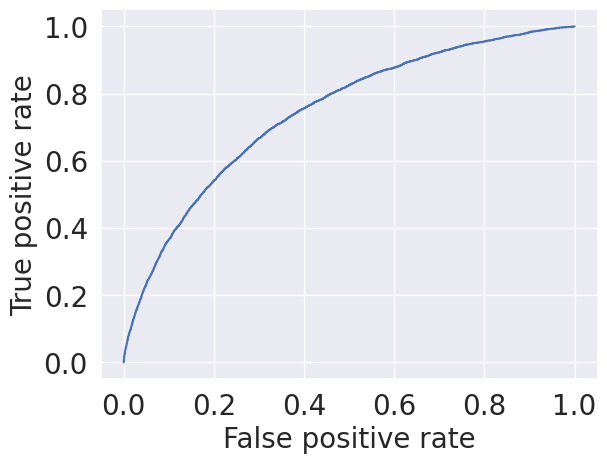

In [ ]:
from sklearn.metrics import roc_curve
xgb_prob = xgb.predict_proba(pd.DataFrame(x_test))[:,1]

# roc curve for models
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, xgb_prob, pos_label=1)


# roc curve 
plt.figure()
plt.plot(fpr_xgb,tpr_xgb)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_dev, y_dev)
lgb_predict = lgb.predict(x_test)

In [ ]:
lgb_hyper = LGBMClassifier(seed=42)
lgbmparams = {
    'learning_rate': [0.1],
    'n_estimators': [50, 100],
    'max_depth': [4],
    'num_leaves':[20,80], 
    'min_child_samples': [1, 5]
 }
lgb_grid = GridSearchCV(
    estimator=lgb_hyper,
    param_grid=lgbmparams,
    scoring = 'accuracy'
)
lgb_grid.fit(x_dev, y_dev)

GridSearchCV(estimator=LGBMClassifier(seed=42),
             param_grid={'learning_rate': [0.1], 'max_depth': [4],
                         'min_child_samples': [1, 5], 'n_estimators': [50, 100],
                         'num_leaves': [20, 80]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, confusion_matrix

confusion_matrix(y_true = y_test, y_pred = lgb_predict)

array([[56488,    50],
       [ 4900,    65]])

In [ ]:
print('Accuracy score: ', accuracy_score(y_true = y_test, y_pred = lgb_predict))
print('Precision score: ', precision_score(y_true = y_test, y_pred = lgb_predict))
print('Recall score: ', recall_score(y_true = y_test, y_pred = lgb_predict))
print('F1_score score: ', f1_score(y_true = y_test, y_pred = lgb_predict))
print('Average precision: ', average_precision_score(y_test, lgb.predict_proba(x_test)[:,1]))

accuracy score:  0.9195161211648212
precision score:  0.5652173913043478
recall score:  0.013091641490433032
f1_score score:  0.025590551181102362
accuracy score:  0.2341811250171205


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


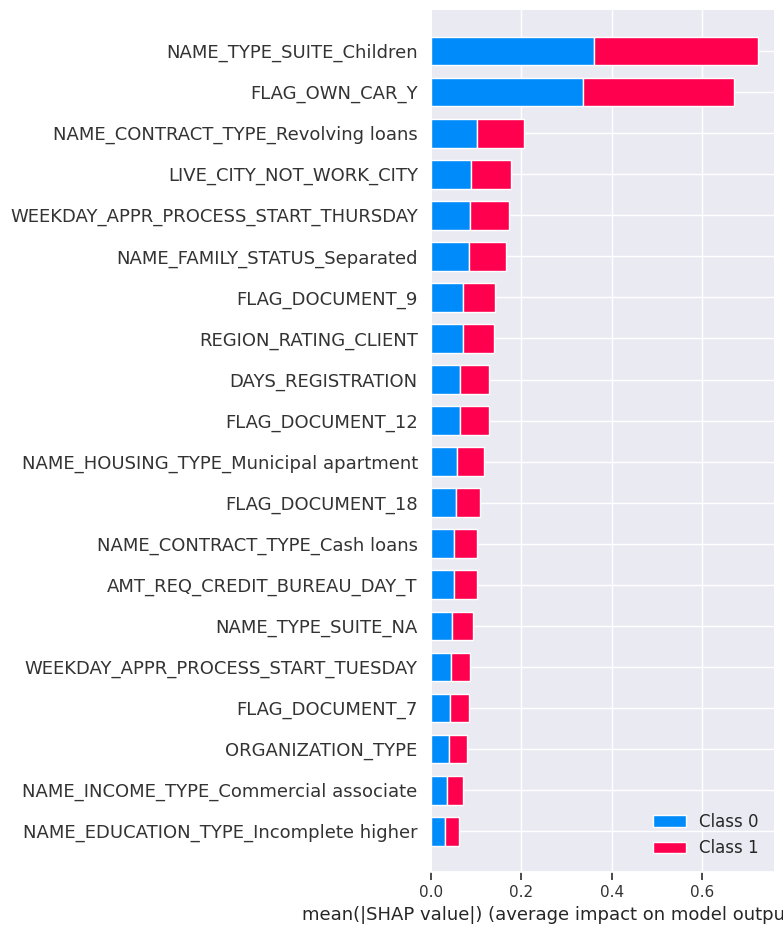

In [ ]:
import shap
explainer_lgb = shap.TreeExplainer(lgb)
shap_values_lgb = explainer_lgb.shap_values(x_test)
shap.summary_plot(shap_values_lgb, x_test)

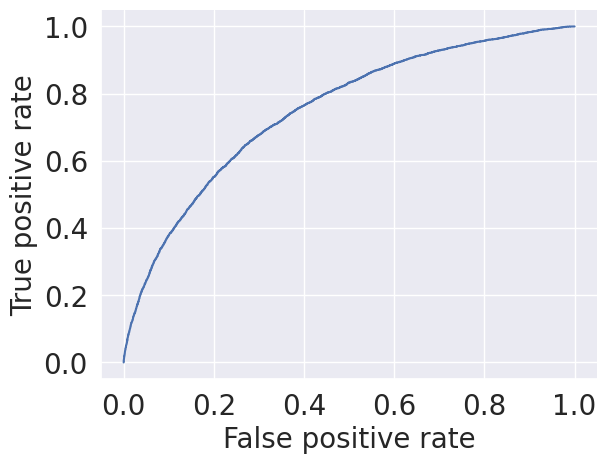

In [ ]:
from sklearn.metrics import roc_curve
lgb_prob = lgb.predict_proba(pd.DataFrame(x_test))[:,1]

# roc curve for models
fpr_lgb, tpr_lgb, thresh_lgb = roc_curve(y_test, lgb_prob, pos_label=1)


# roc curve 
plt.figure()
plt.plot(fpr_lgb,tpr_lgb)
plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

## Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

nn = Sequential([
    Dense(128, input_shape = (x_dev.shape[1],), activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               13440     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 23,842
Trainable params: 23,842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history_callback = nn.fit(x_dev, y_dev, batch_size = 128,
                             epochs = 10, verbose = 1)

hist = pd.DataFrame(history_callback.history)

Epoch 1/10
1922/1922 [==============================] - 16s 8ms/step - loss: 0.2576 - accuracy: 0.9189
Epoch 2/10
1922/1922 [==============================] - 9s 5ms/step - loss: 0.2526 - accuracy: 0.9192
Epoch 3/10
1922/1922 [==============================] - 6s 3ms/step - loss: 0.2511 - accuracy: 0.9193
Epoch 4/10
1922/1922 [==============================] - 9s 4ms/step - loss: 0.2498 - accuracy: 0.9193
Epoch 5/10
1922/1922 [==============================] - 6s 3ms/step - loss: 0.2487 - accuracy: 0.9195
Epoch 6/10
1922/1922 [==============================] - 8s 4ms/step - loss: 0.2472 - accuracy: 0.9195
Epoch 7/10
1922/1922 [==============================] - 6s 3ms/step - loss: 0.2456 - accuracy: 0.9197
Epoch 8/10
1922/1922 [==============================] - 8s 4ms/step - loss: 0.2439 - accuracy: 0.9200
Epoch 9/10
1922/1922 [==============================] - 10s 5ms/step - loss: 0.2419 - accuracy: 0.9204
Epoch 10/10
1922/1922 [==============================] - 6s 3ms/step - loss: 0.2

In [ ]:
score = nn.evaluate(x_test,y_test)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

1922/1922 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9183
Test loss: 0.256
Test Accuracy: 0.918


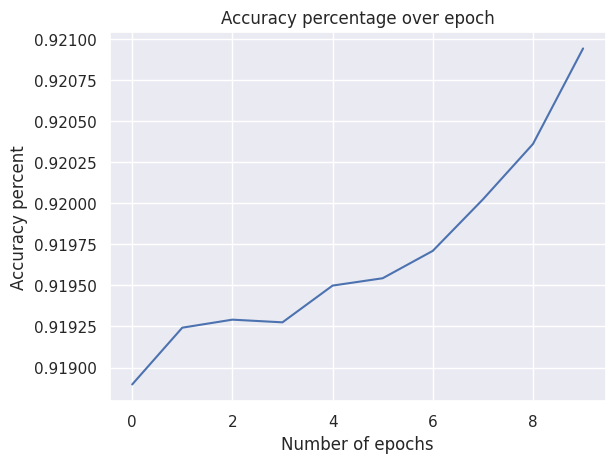

Text(0, 0.5, 'Loss percent')

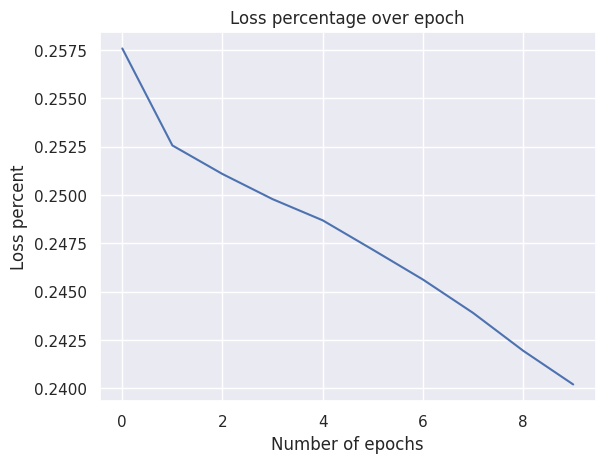

In [ ]:
fig.add_subplot(121)
plt.plot(history_callback.history['accuracy'])
plt.title('Accuracy percentage over epoch')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy percent')
plt.show()

fig.add_subplot(122)
plt.plot(history_callback.history['loss'])
plt.title('Loss percentage over epoch')
plt.xlabel('Number of epochs')
plt.ylabel('Loss percent')